In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib as mpl

In [3]:
# Default parameters for matplotlib plots
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.facecolor'] = (0.9,0.9,0.9)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'w'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 22

In [4]:
# create made-up data set
def true_fun(X):
    return np.cos(1.5 * np.pi * X) 

n_samples = 50
noise = 0.1

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * noise

X = X[:, np.newaxis]
print(X,y)

[[0.07355899]
 [0.08325827]
 [0.08820345]
 [0.09257927]
 [0.10123985]
 [0.1263336 ]
 [0.13257643]
 [0.18272458]
 [0.2074853 ]
 [0.20927078]
 [0.21039516]
 [0.22418862]
 [0.23439743]
 [0.32041566]
 [0.3349424 ]
 [0.34459922]
 [0.3507675 ]
 [0.3688598 ]
 [0.37996947]
 [0.38349919]
 [0.39311234]
 [0.42419871]
 [0.43327305]
 [0.43511496]
 [0.46075232]
 [0.50495293]
 [0.54404229]
 [0.54593941]
 [0.5726147 ]
 [0.5729494 ]
 [0.61666877]
 [0.63747908]
 [0.65744996]
 [0.69434198]
 [0.69878757]
 [0.70815968]
 [0.71990151]
 [0.72319154]
 [0.72701128]
 [0.77865607]
 [0.78165864]
 [0.80274511]
 [0.81257667]
 [0.85087233]
 [0.86707046]
 [0.91074792]
 [0.91366255]
 [0.92108833]
 [0.93561639]
 [0.93751547]] [ 0.9095168   1.0526336   0.93181845  0.75291829  0.82213308  0.90118454
  0.6706804   0.67758921  0.64023074  0.53567348  0.4438163   0.30353381
  0.48886612  0.0138007   0.27161476 -0.19302941 -0.0297943  -0.26640006
 -0.1098829  -0.18978162 -0.11260068 -0.39456895 -0.48987031 -0.35577758
 -0.665

In [5]:
# helper function for plotting
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)
    
    plt.figure()
    plt.fill_between(ticks,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Test score')
    plt.legend(fancybox=True, facecolor='w')

    x_min = np.argmin(test_scores_mean) #index of smallest mean test error
    return x_min, plt.gca()

model_complexity 0


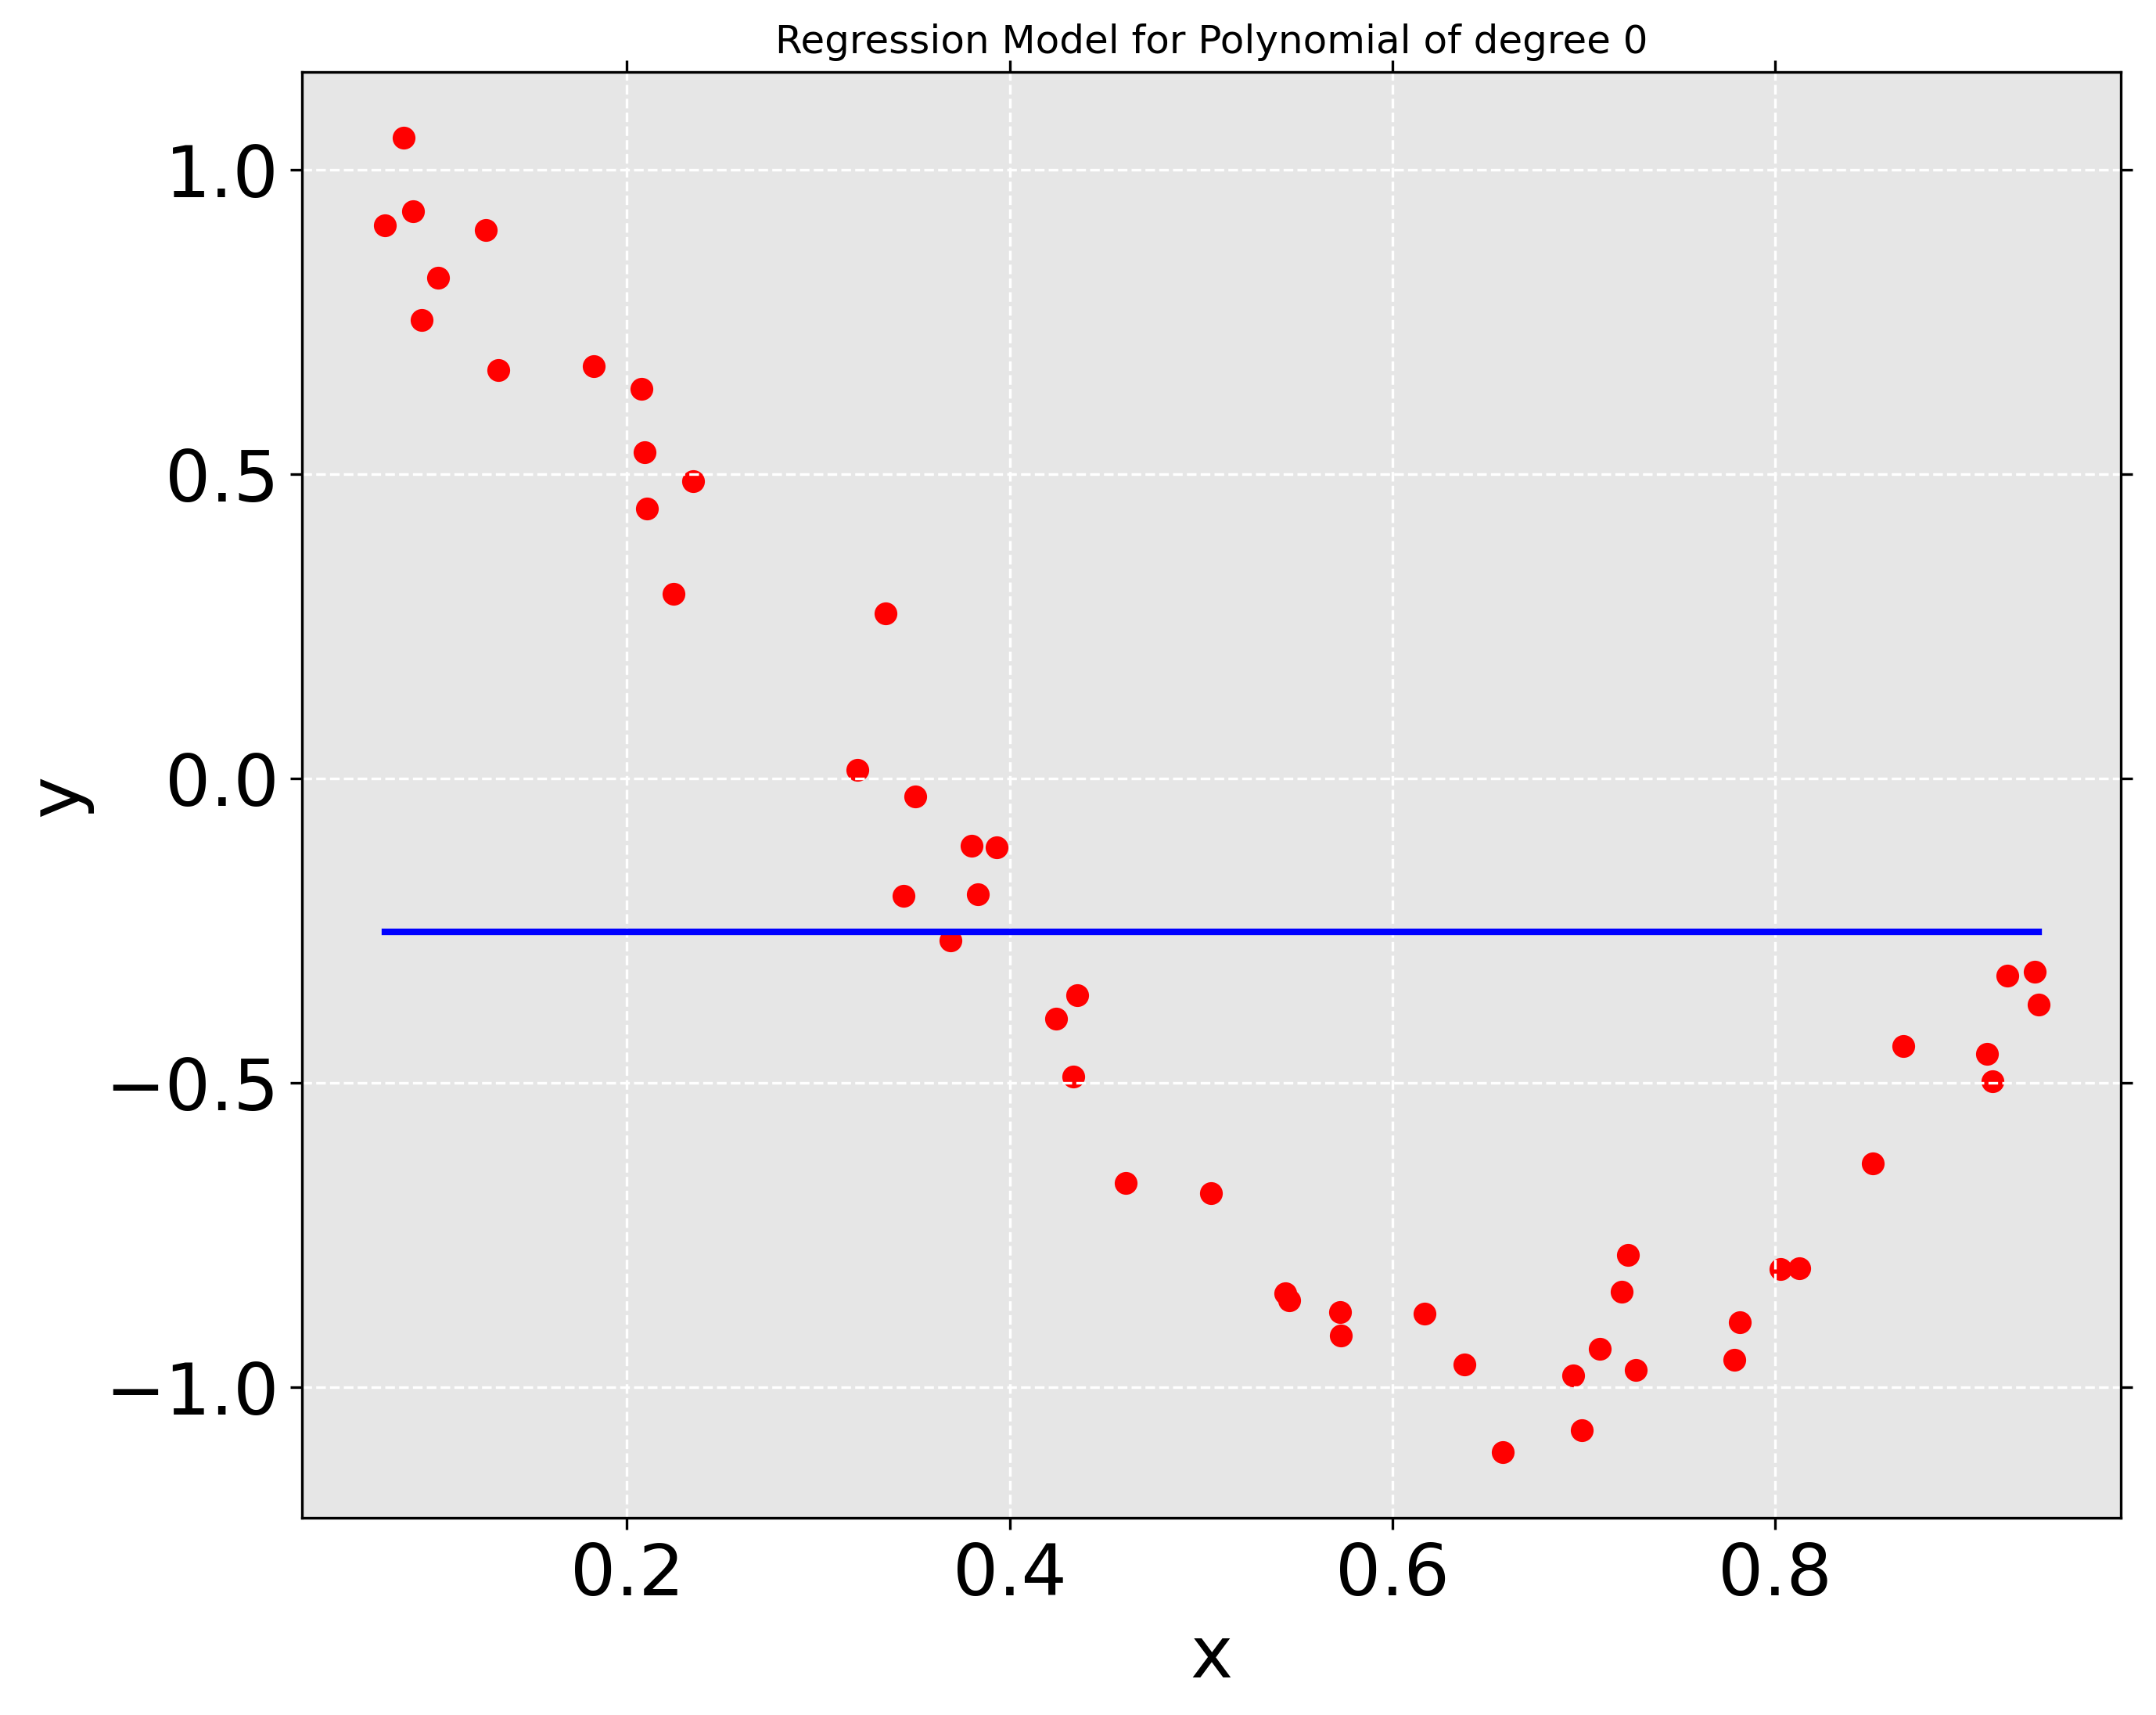

model_complexity 1


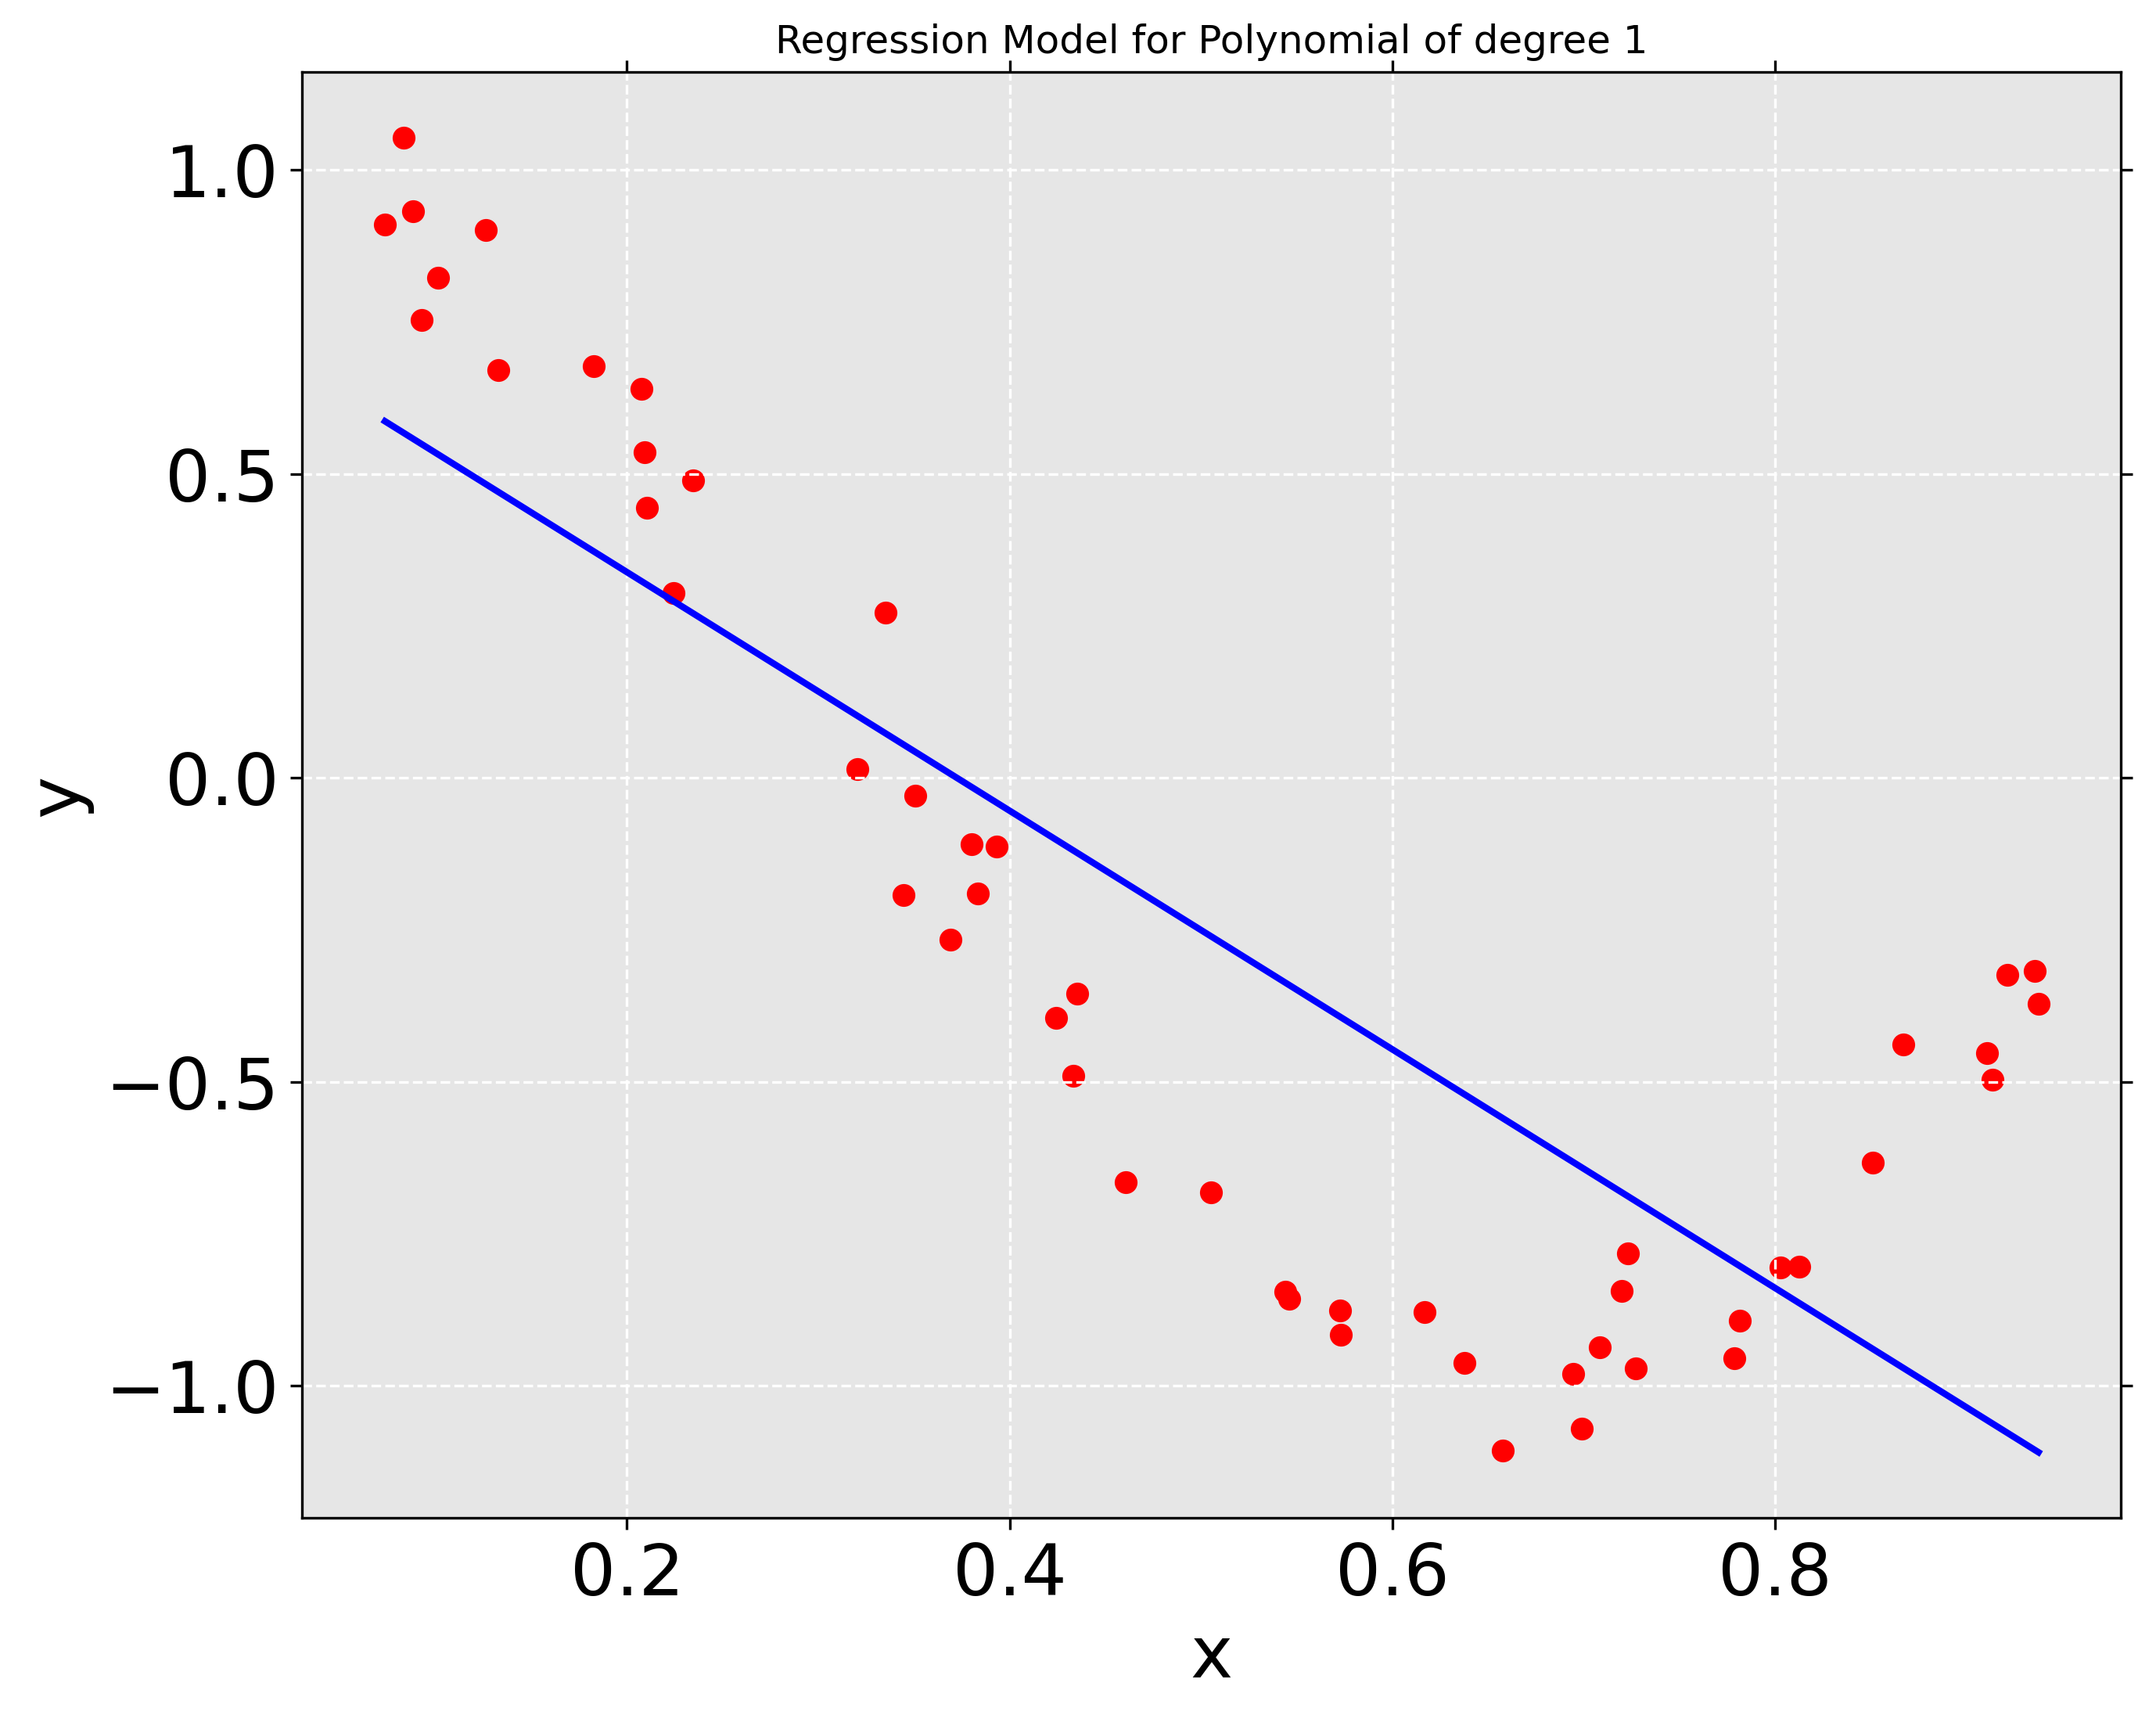

model_complexity 2


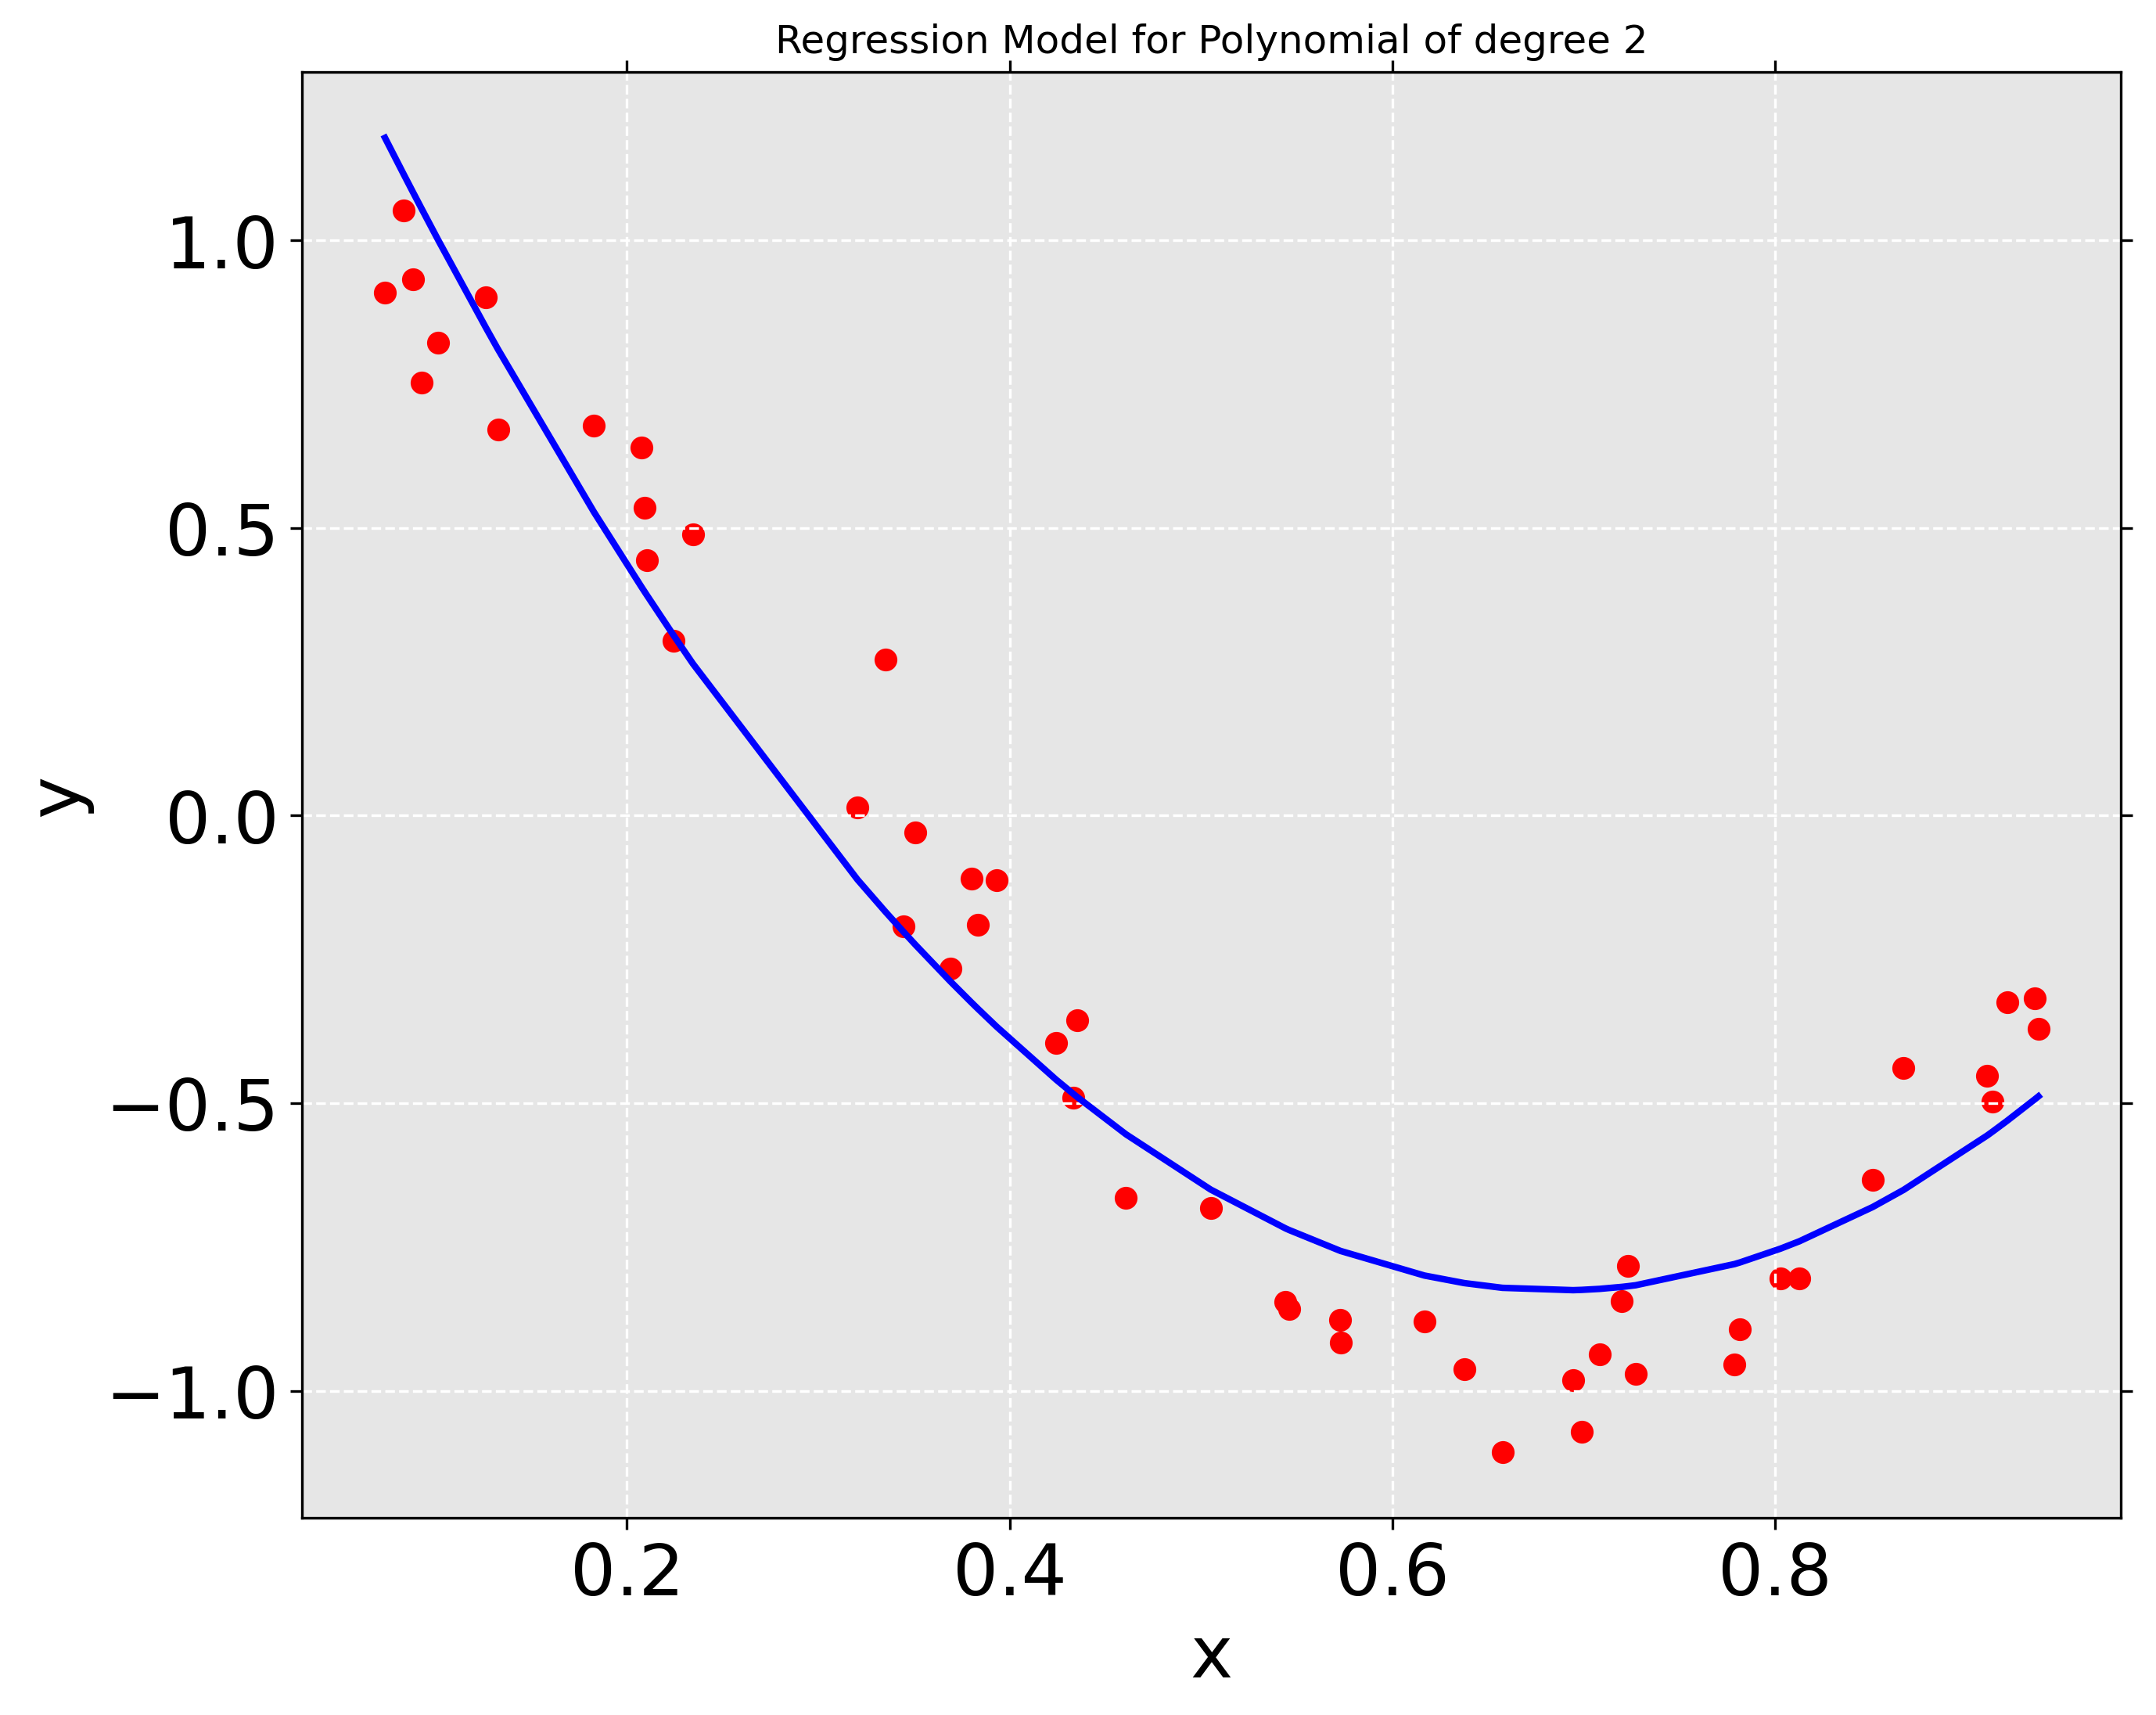

model_complexity 3


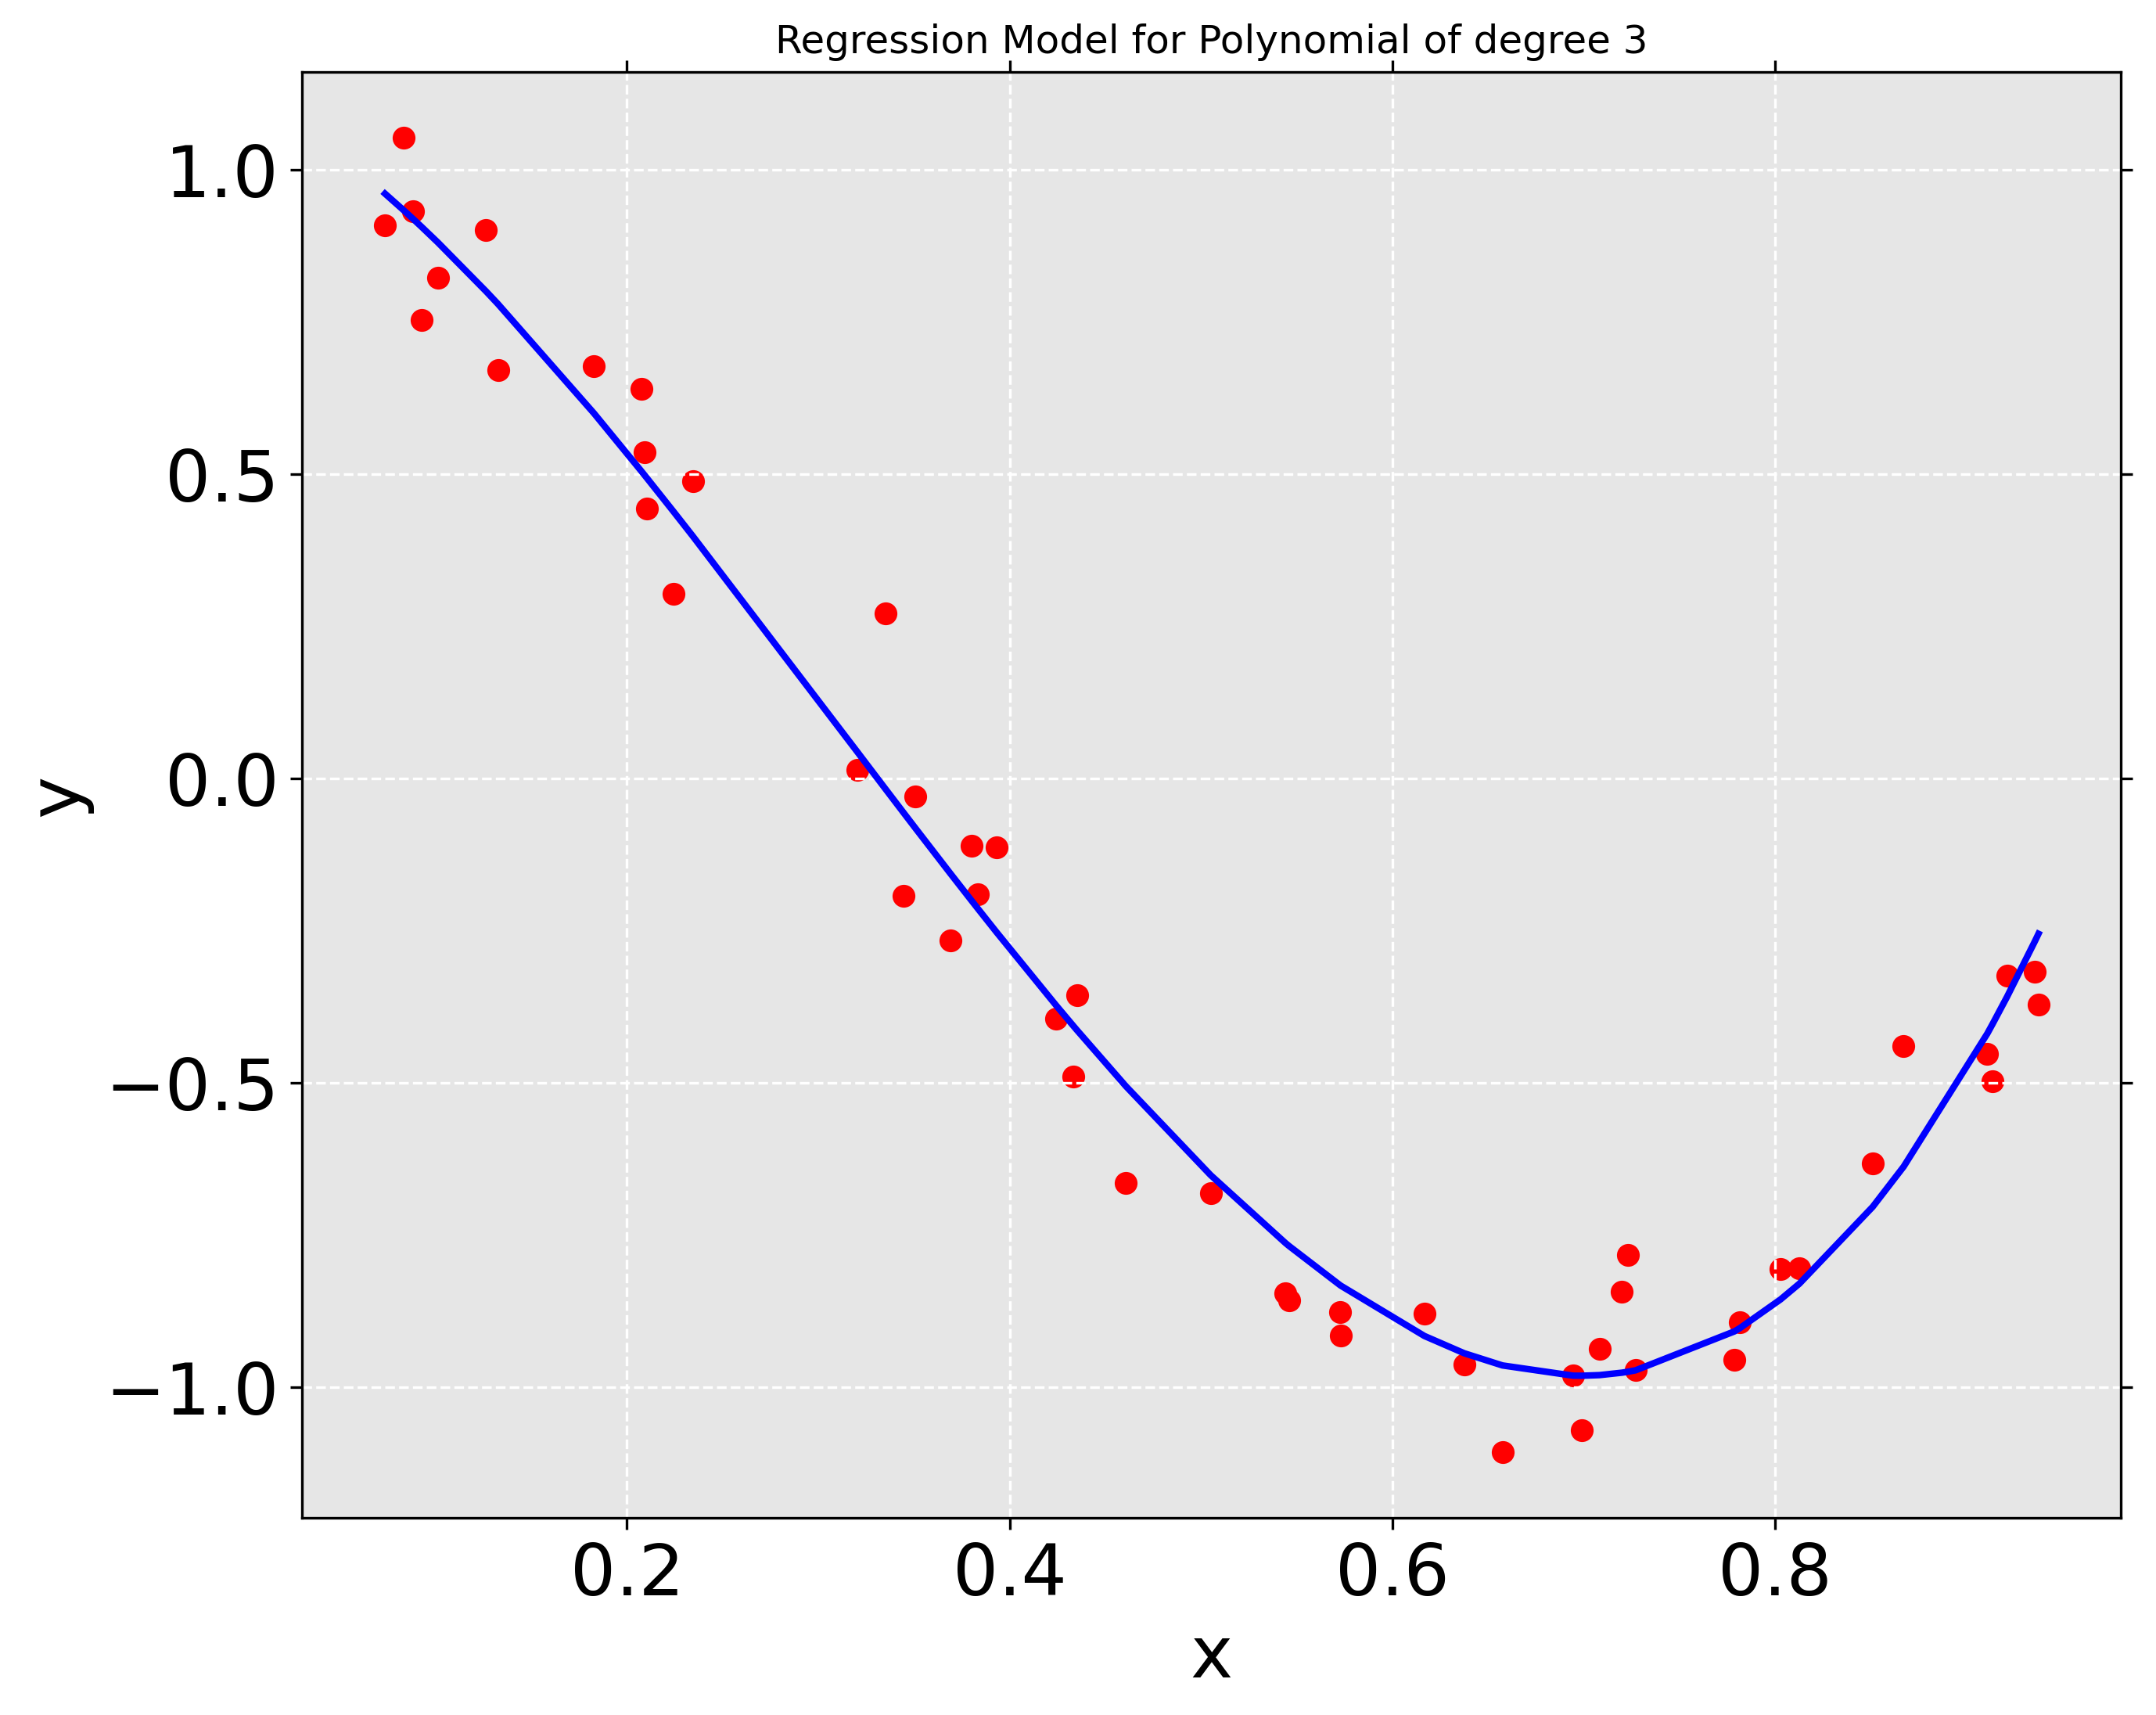

model_complexity 4


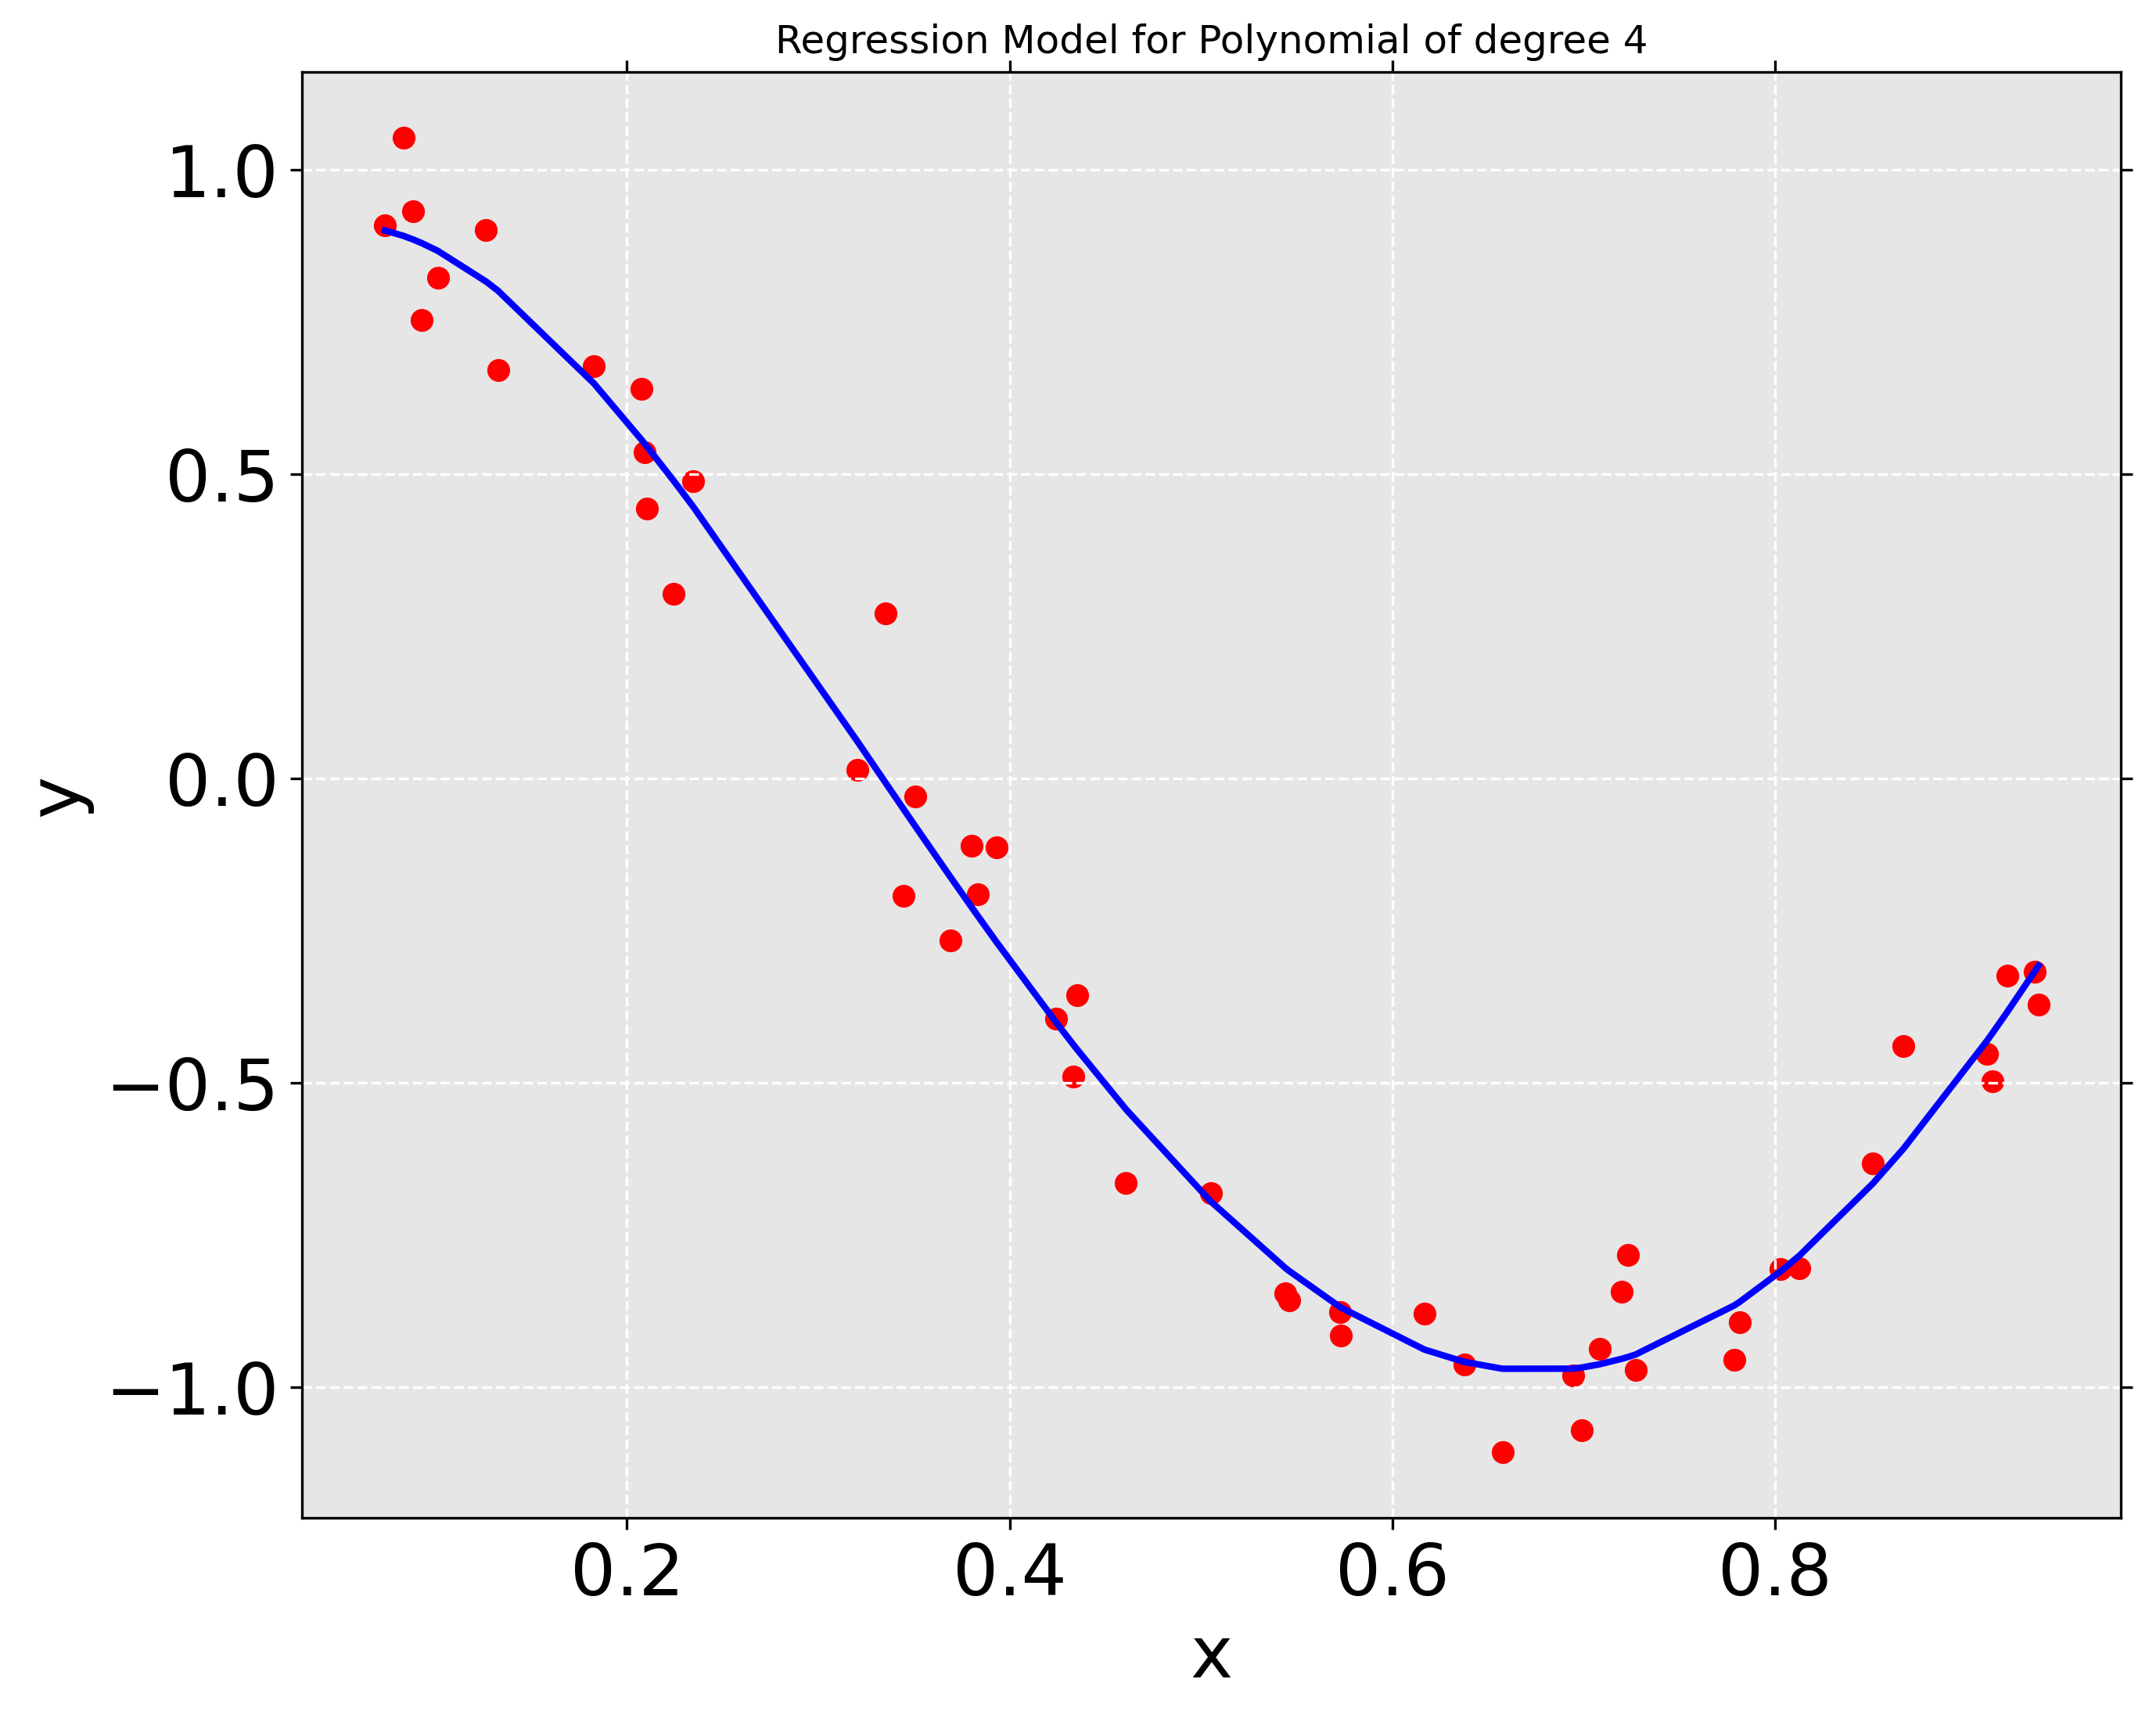

model_complexity 5


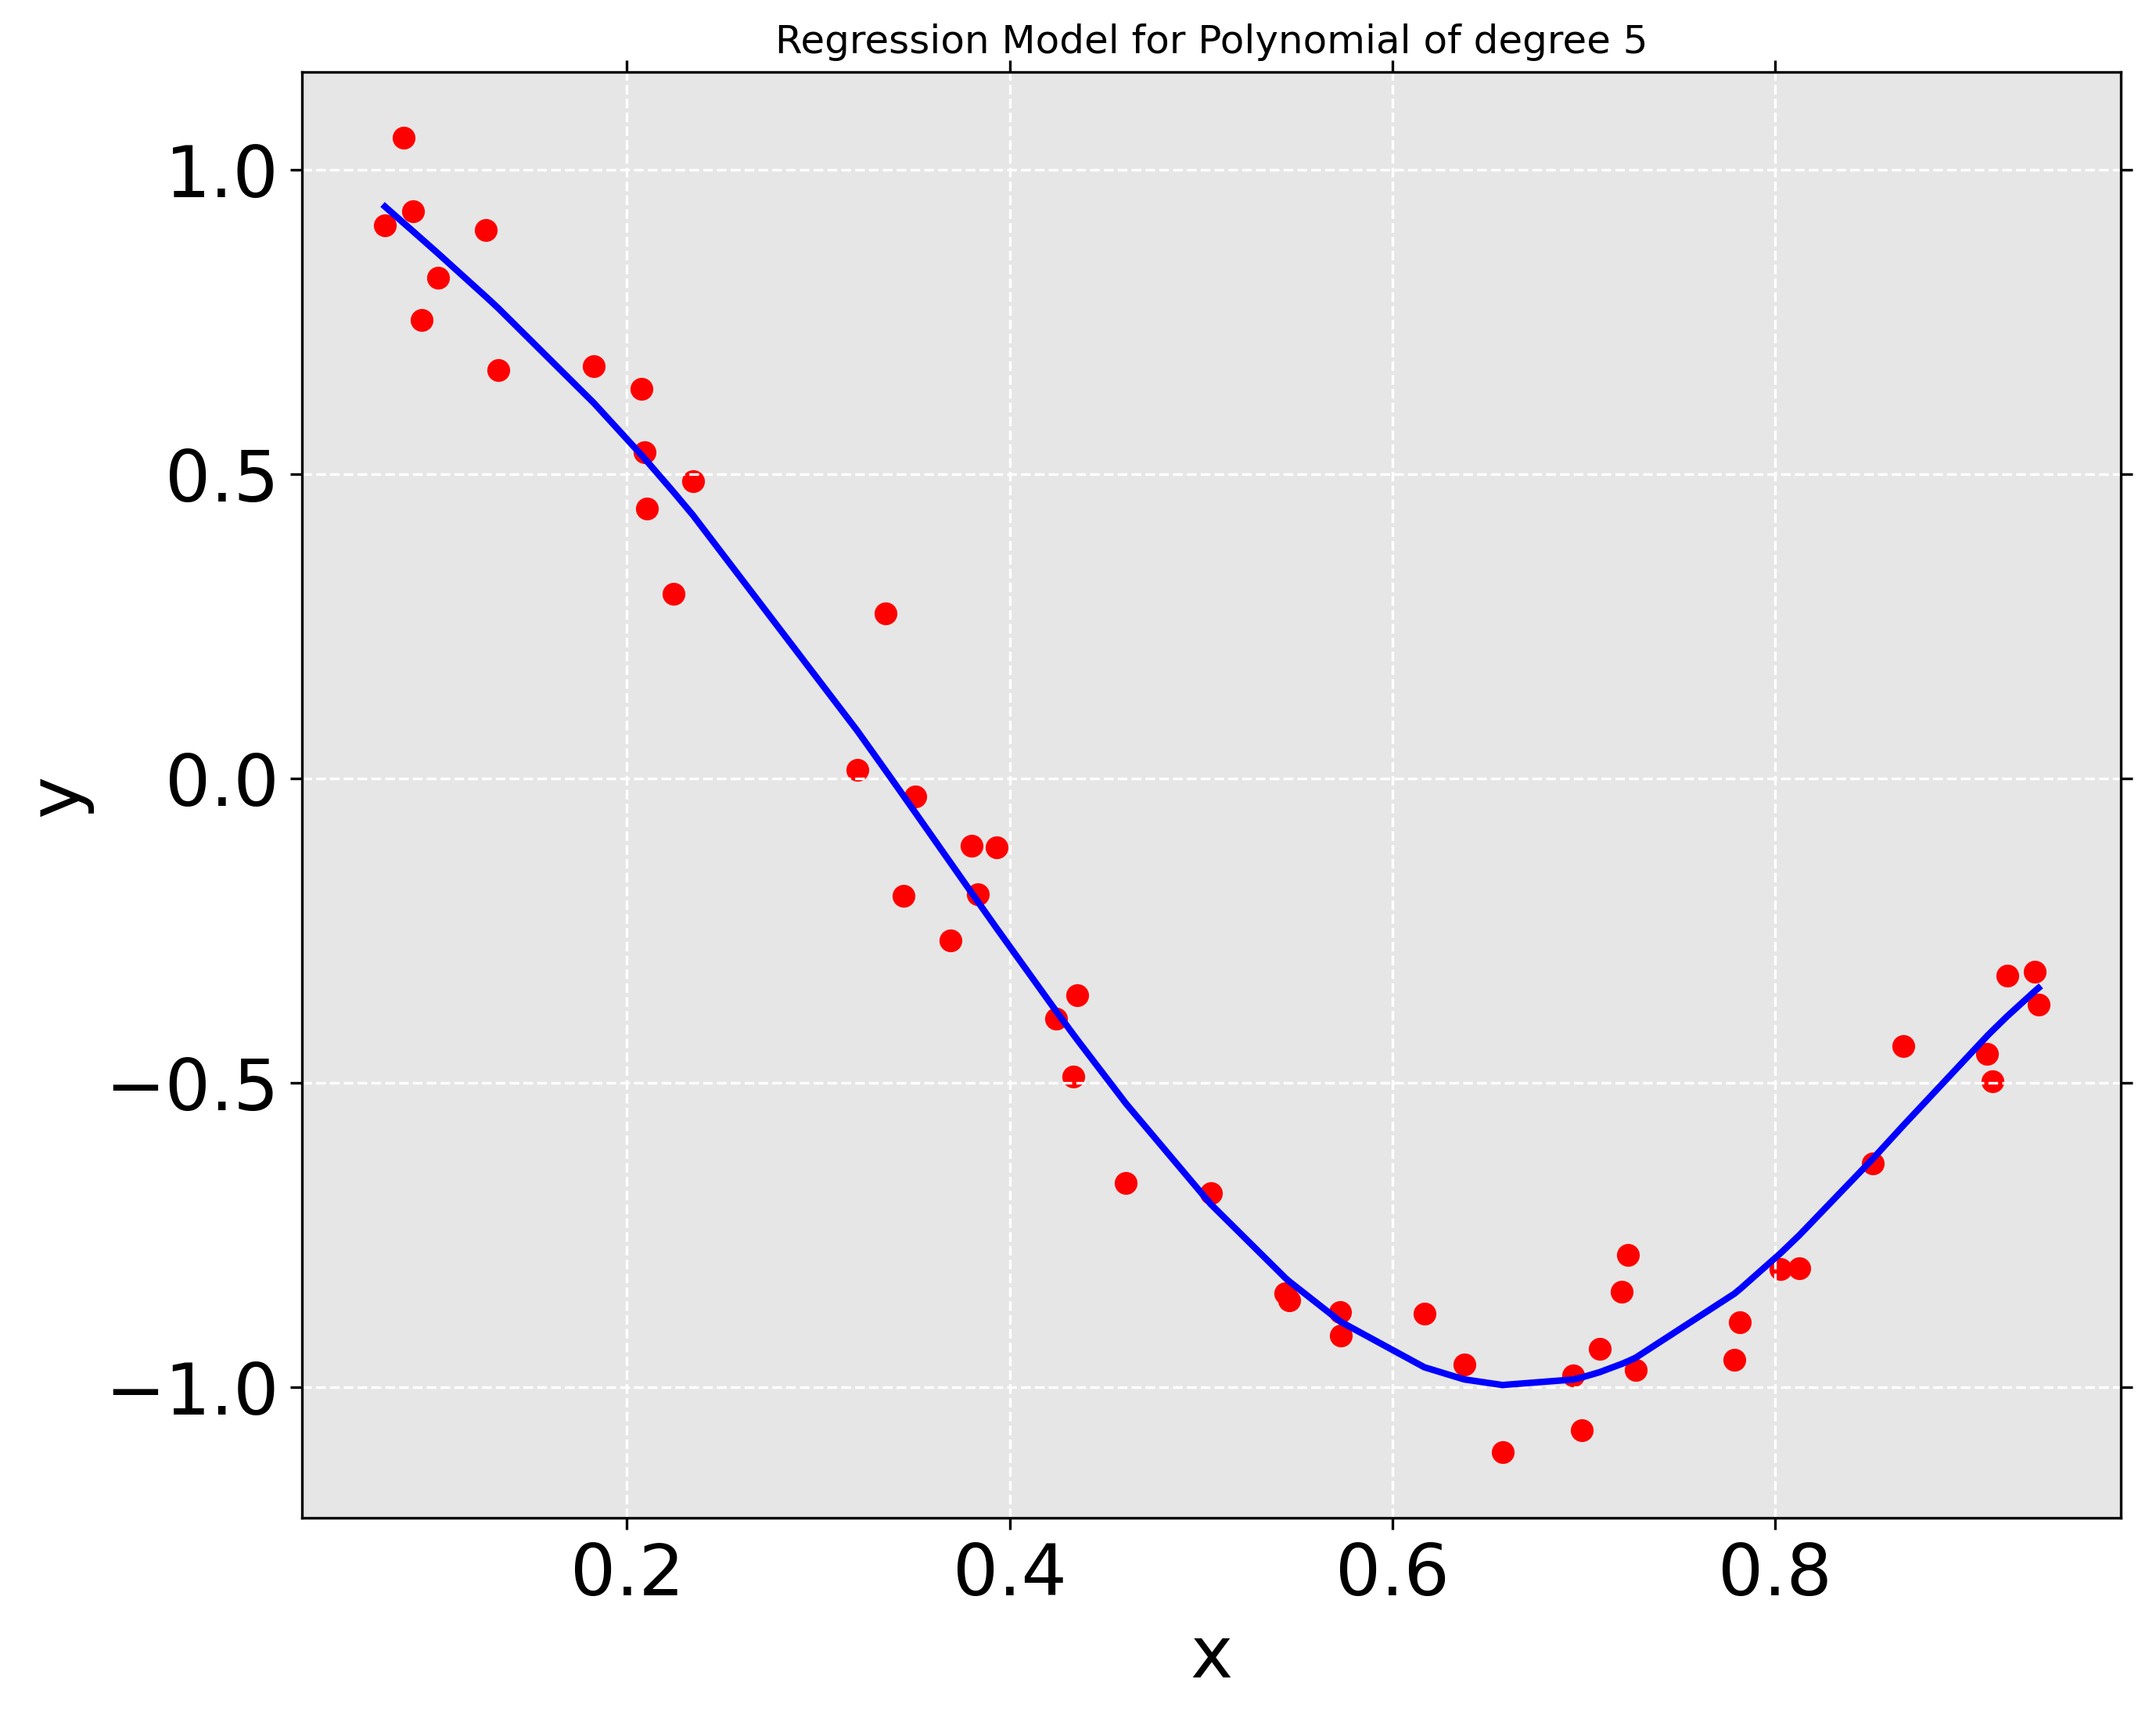

model_complexity 6


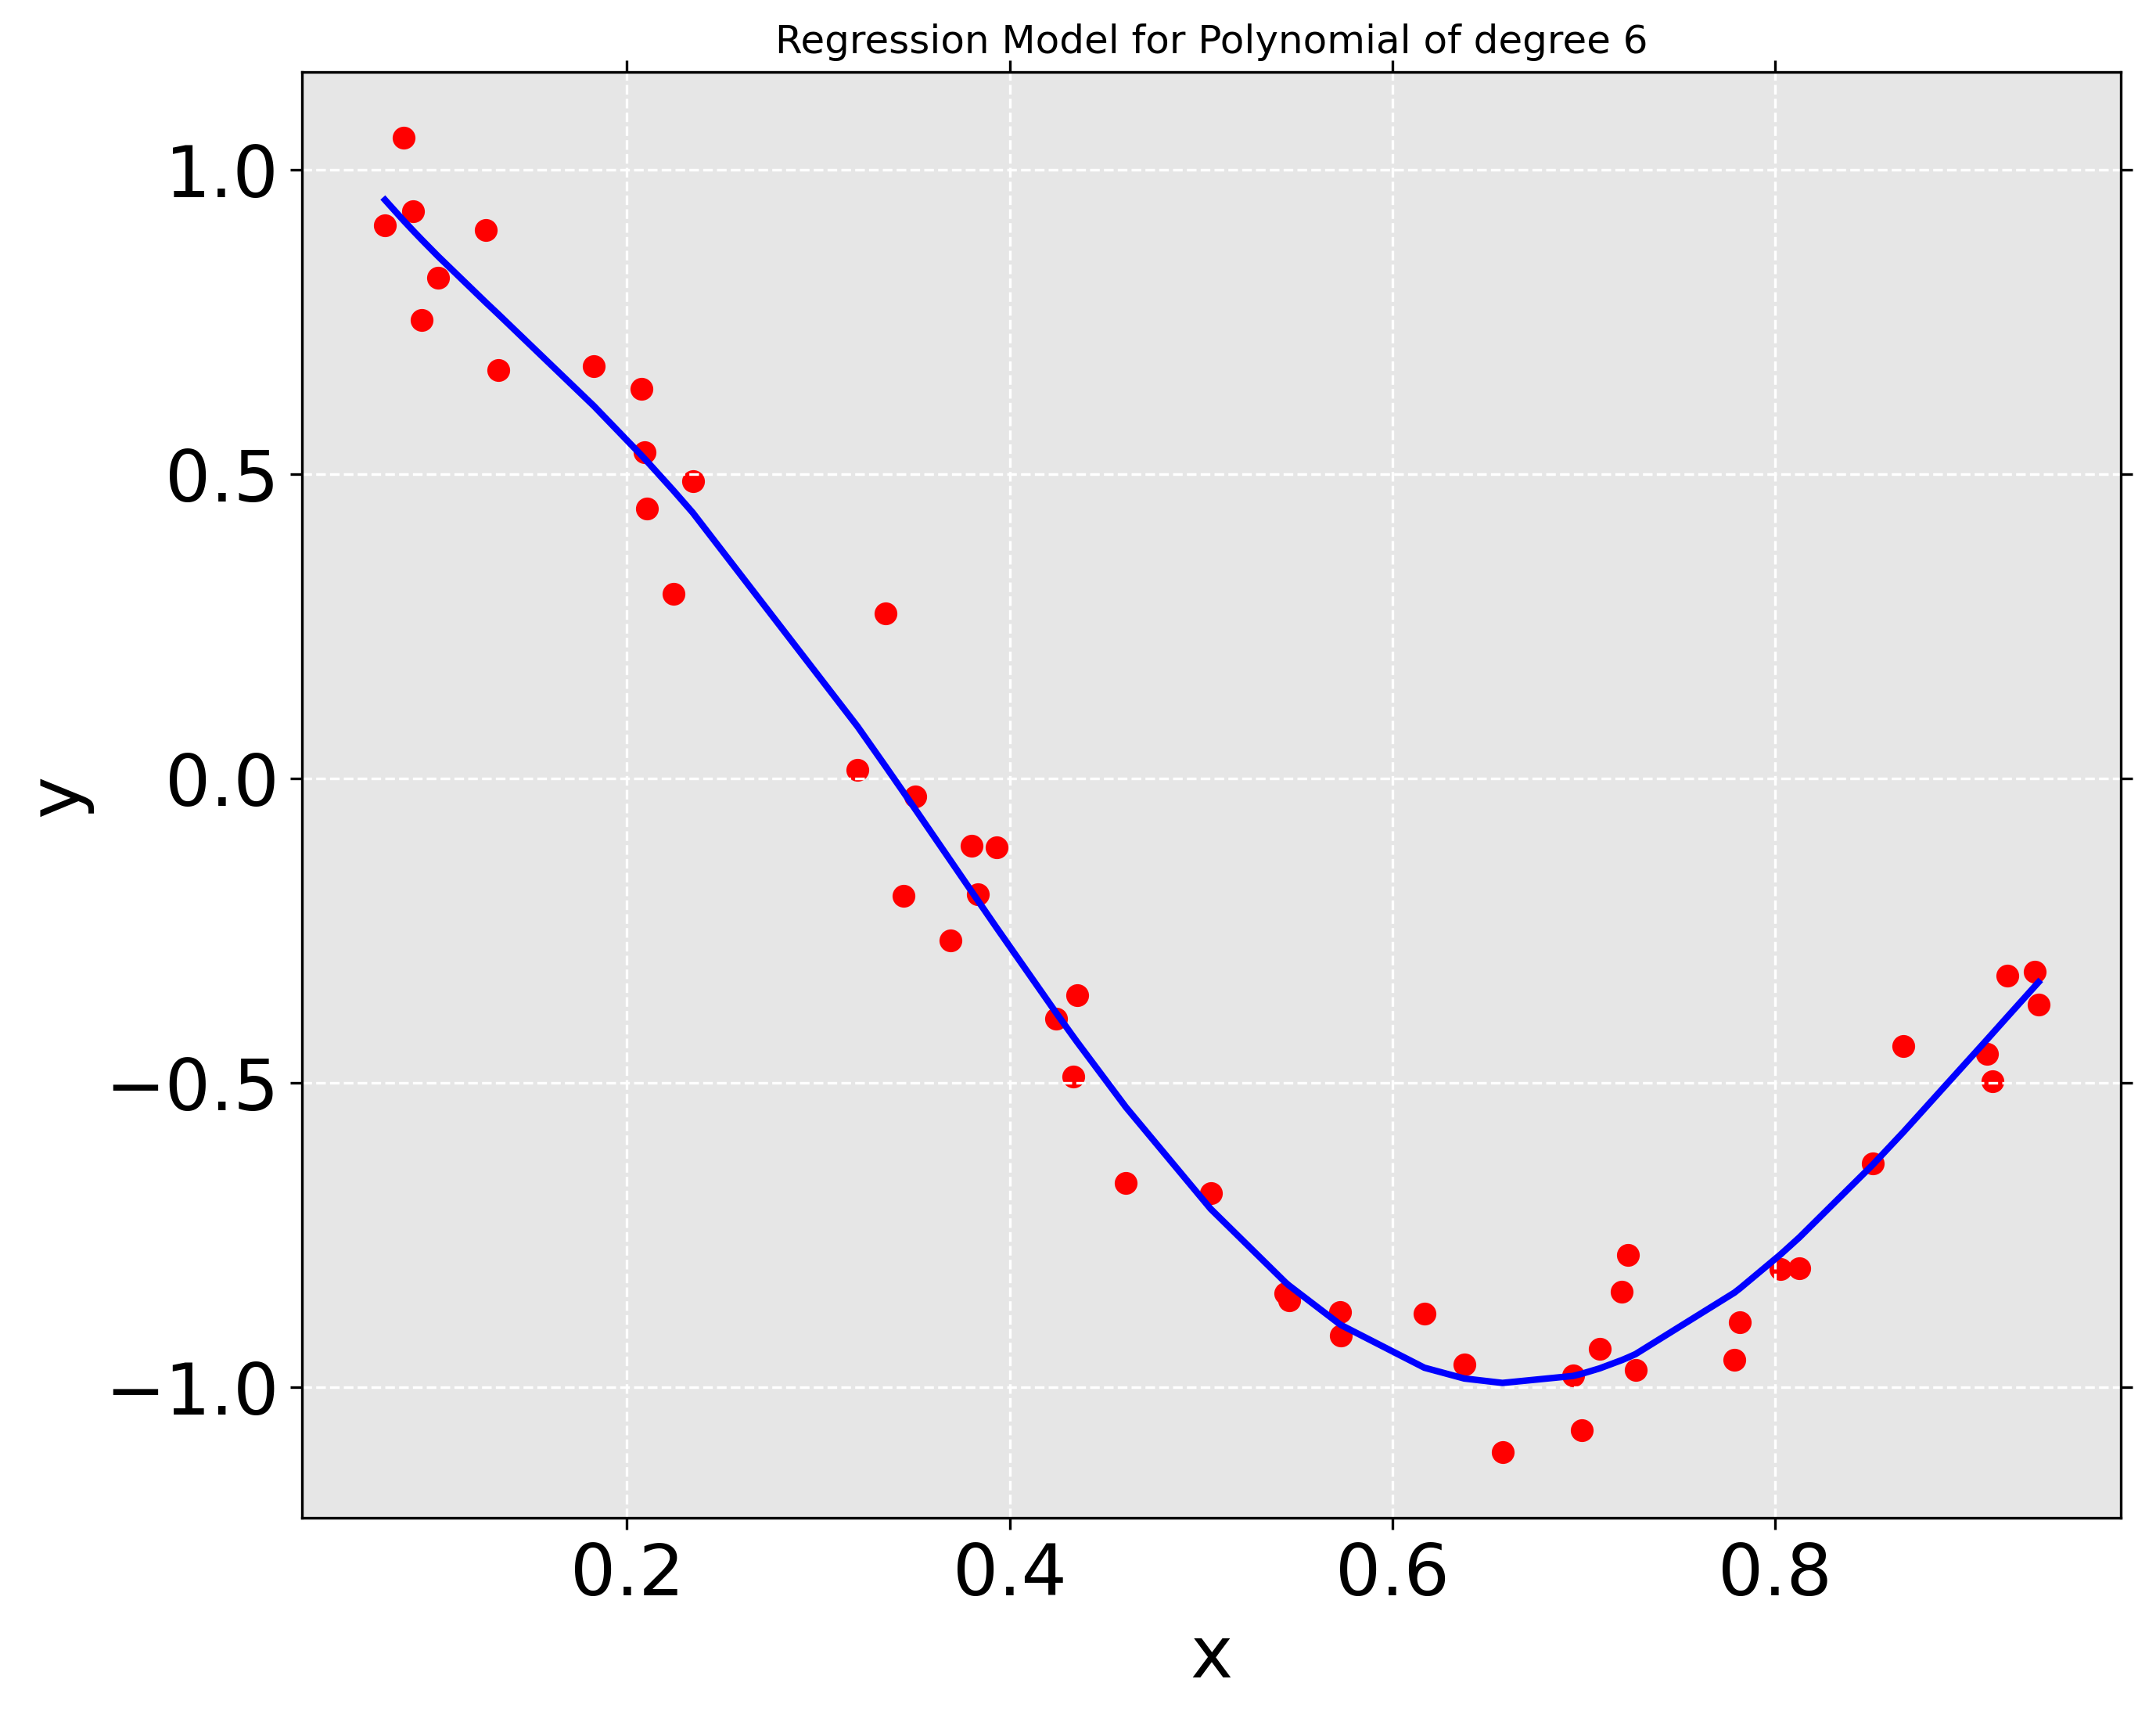

<Figure size 3000x2400 with 0 Axes>

In [6]:
# create models of varying complexity
lmodel_complexity = range(7)

for model_complexity in lmodel_complexity:
    print('model_complexity',model_complexity)
    model = make_pipeline(PolynomialFeatures(model_complexity),LinearRegression())
    model.fit(X,y)

    # plot model fits
    plt.scatter(X, y, color = 'red')
    plt.plot(X, model.predict(X), color = 'blue')
    plt.title('Regression Model for Polynomial of degree %i'%model_complexity)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    plt.clf()

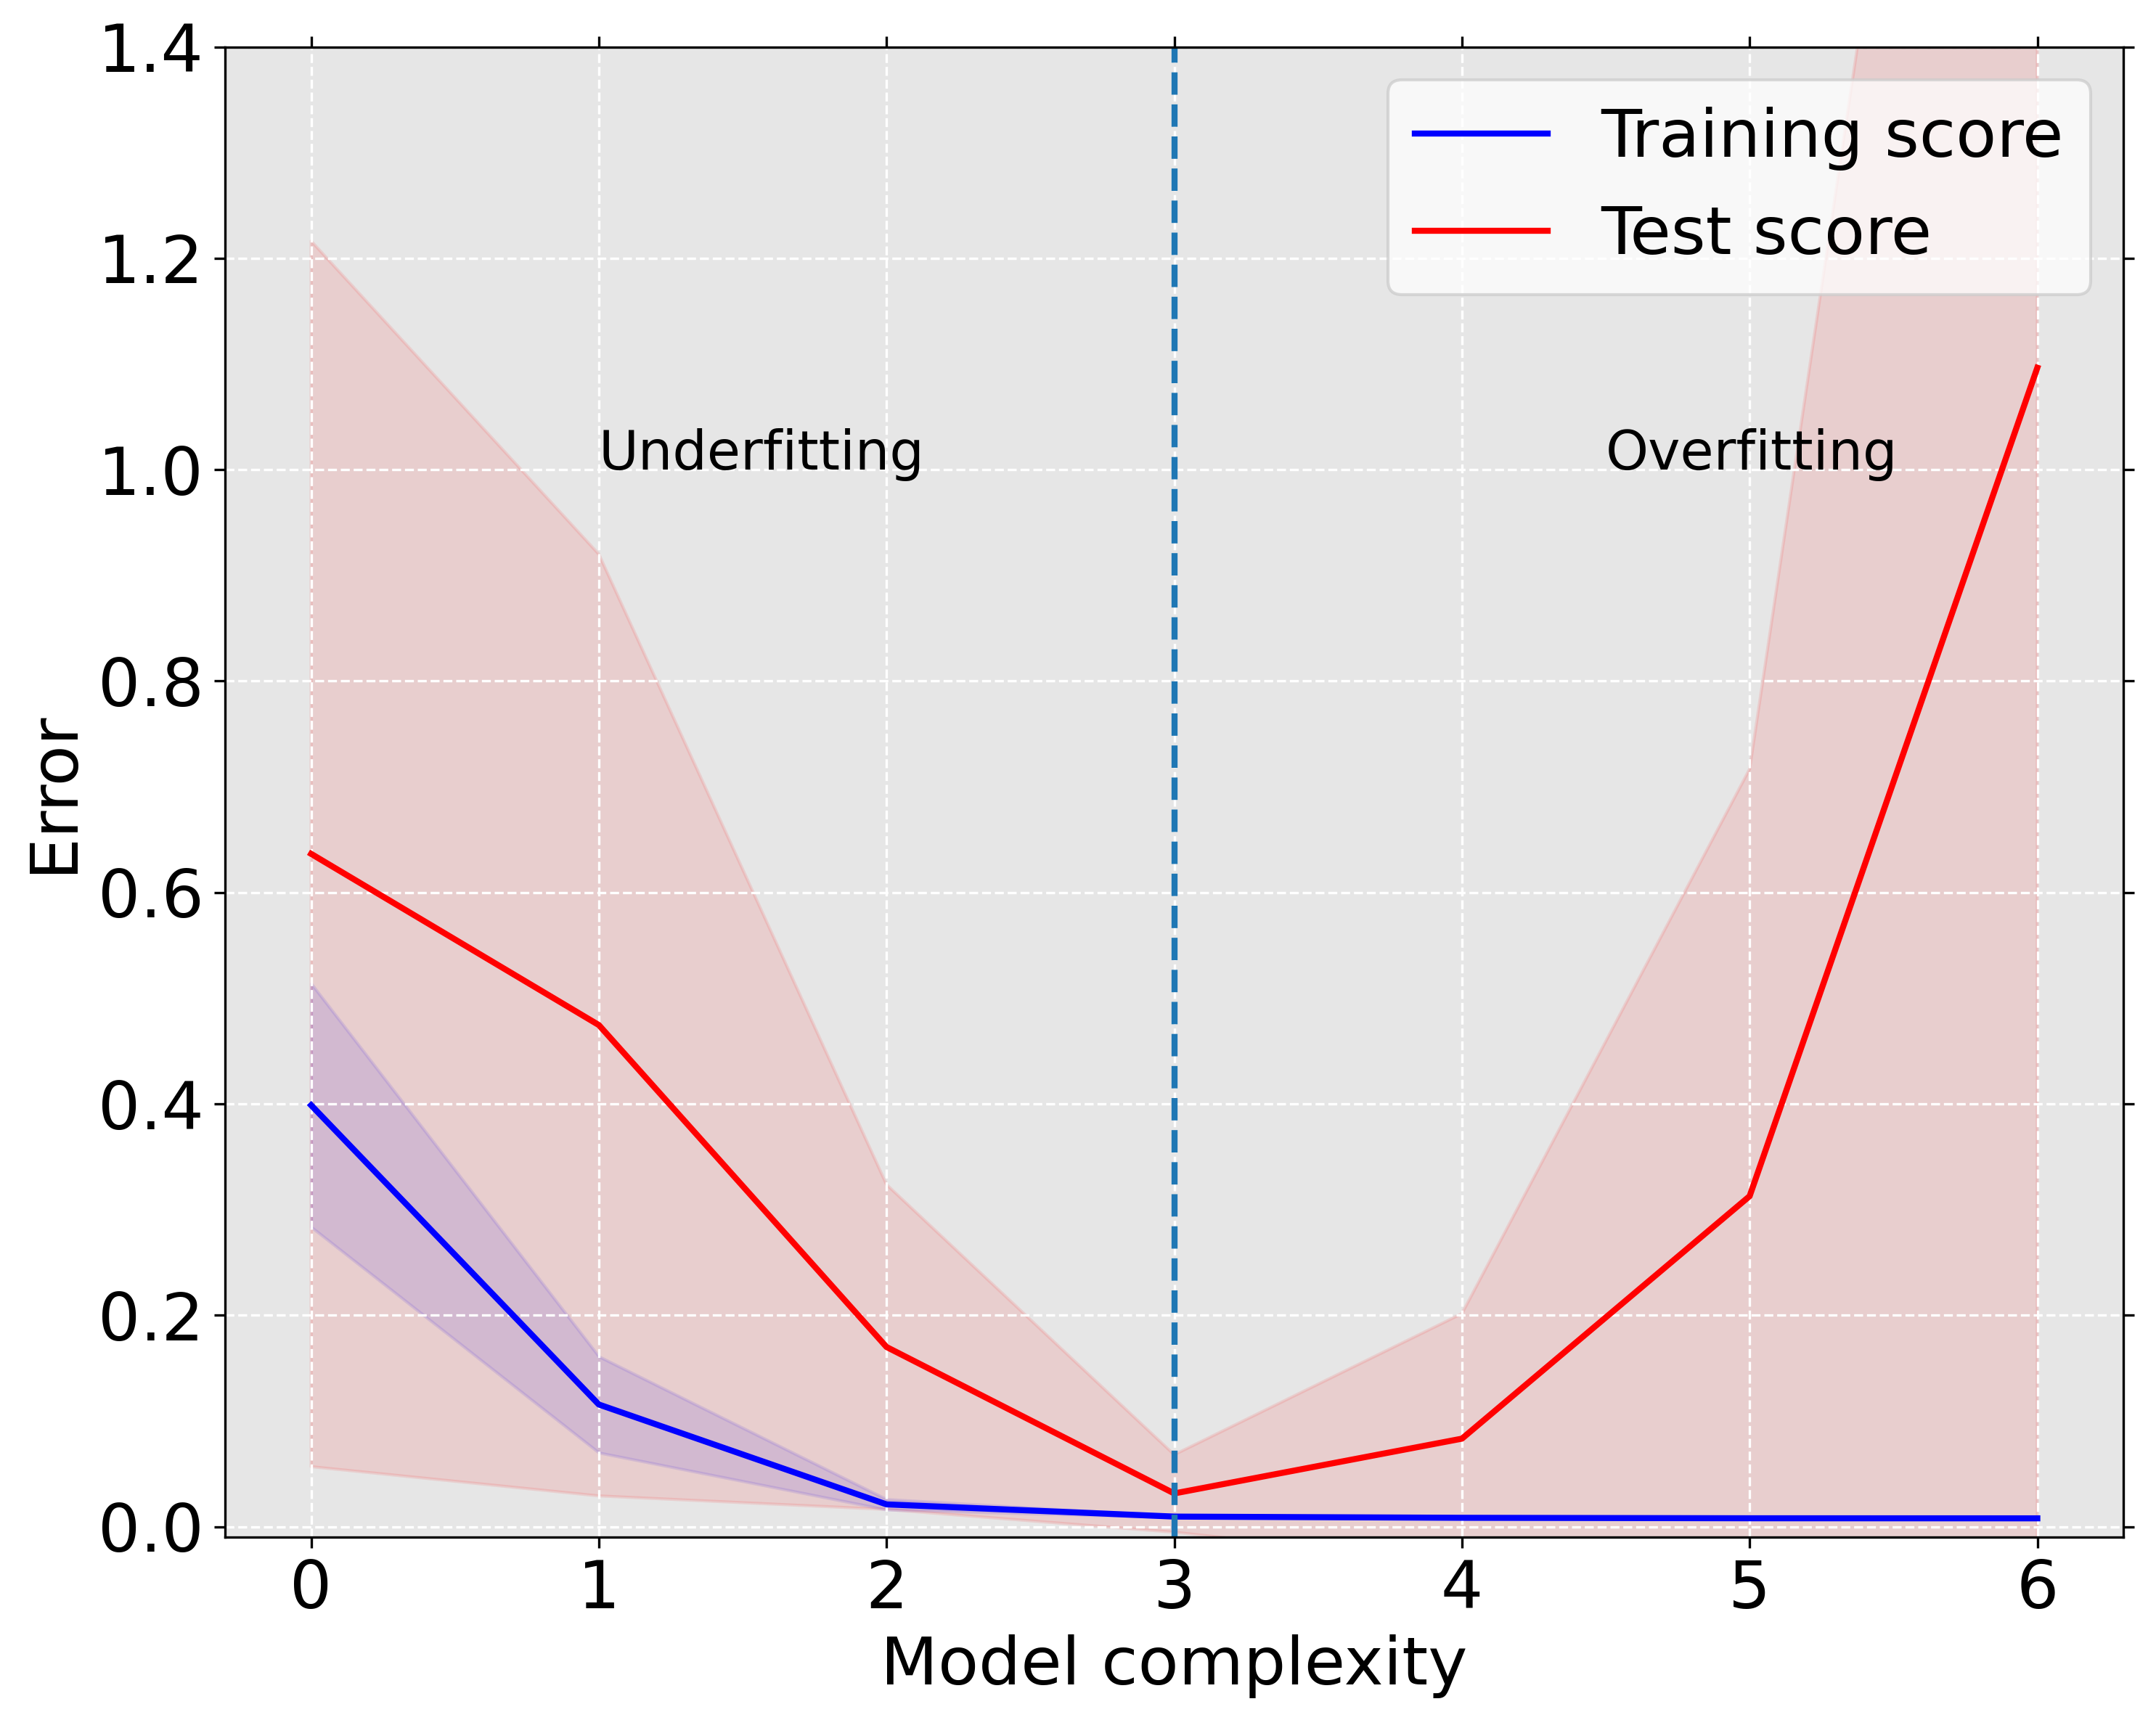

In [7]:
# Plot training and test scores for varying parameter values
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='neg_mean_squared_error'):
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html
    xmin,ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=5,
                                                   scoring=scoring,
                                                   param_name=param_name,
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    #ax.set_ylim(-3, 2)
    ax.set_ylim(-0.01, 1.4)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(4.5, 1, 'Overfitting', fontsize=18)
    ax.text(1, 1, 'Underfitting', fontsize=18)
    ax.axvline(xmin, ls='--')
    plt.tight_layout()
    plt.show()
    return

plot_validation_curve(model, X, y, param_name='polynomialfeatures__degree', 
                      param_range=lmodel_complexity)

In [10]:
scoring='r2'
#scoring='neg_mean_squared_error'
train_scores, test_scores = validation_curve(model, X, y, cv=5, scoring=scoring, param_name='polynomialfeatures__degree', param_range=lmodel_complexity, n_jobs=-1)

Exception ignored in: <function ResourceTracker.__del__ at 0x104dfd580>
Traceback (most recent call last):
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104aa5580>
Traceback (most recent call last):
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessErr

In [9]:
train_scores, test_scores

(array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.36943942, 0.64549472, 0.73643634, 0.63378081, 0.93419325],
        [0.92128096, 0.95586097, 0.93912336, 0.93609491, 0.96439746],
        [0.94634002, 0.98253151, 0.9788431 , 0.97327279, 0.98040758],
        [0.95757096, 0.98653009, 0.97999973, 0.97647436, 0.98042551],
        [0.95766601, 0.98725702, 0.98086717, 0.97877765, 0.98172736],
        [0.95792989, 0.98759018, 0.98088548, 0.97882979, 0.98188708]]),
 array([[-7.29986430e+01, -2.34217254e+00, -3.19142124e+00,
         -8.89392277e+01, -3.42577340e+00],
        [-2.36535072e+01,  5.77902017e-01, -2.91873044e+00,
         -2.44413030e+01, -3.01224296e+01],
        [-1.32122801e+01,  7.12613462e-02,  7.10123841e-01,
         -5.19083938e+00, -8.19488060e+00],
        [ 3.46954051e-01,  7.72090425e-01,  8.23696323e-01,
         -1.32607386e-01, -1.51534657e+00],
        [-1.26009987e+01,  7.34650772e-01,  9.01882261e-01,
          3.33697586e-02, -6.138